# 1. Multi Layer Perceptron

In [1]:
# Adapted from the code on https://www.tensorflow.org/tutorials/images/cnn 
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

### 1.1 0 hidden layers
This is the MLP with 0 hidden layers. In model 0,1 and 2 the Adam optimizer is used. The Adam optimizer uses a form of stochastic gradient descent. This sets the standard learning rate to 0.001. The other initialization parameters are also set to the standard ones of the adam optimizer. 

beta_1=0.9

beta_2=0.999

epsilon=1e-07

The rest is set to False or None.

In [4]:
with tf.device('/CPU:0'):
  model_0 = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
    ])

  model_0.compile(optimizer="adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics=["accuracy"])

  history_0 = model_0.fit(train_images, train_labels, epochs=150,
                        validation_data=(test_images, test_labels))

  model_0_test_loss, model_0_test_acc = model_0.evaluate(test_images, test_labels)

Epoch 1/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9677 - accuracy: 0.3153 - val_loss: 1.9682 - val_accuracy: 0.3047
Epoch 2/150
1563/1563 [==============================] - 1s 836us/step - loss: 1.8885 - accuracy: 0.3515 - val_loss: 2.0466 - val_accuracy: 0.2955
Epoch 3/150
1563/1563 [==============================] - 1s 804us/step - loss: 1.8539 - accuracy: 0.3629 - val_loss: 1.9282 - val_accuracy: 0.3360
Epoch 4/150
1563/1563 [==============================] - 1s 883us/step - loss: 1.8456 - accuracy: 0.3691 - val_loss: 1.8271 - val_accuracy: 0.3608
Epoch 5/150
1563/1563 [==============================] - 1s 868us/step - loss: 1.8333 - accuracy: 0.3727 - val_loss: 1.8221 - val_accuracy: 0.3678
Epoch 6/150
1563/1563 [==============================] - 1s 791us/step - loss: 1.8215 - accuracy: 0.3766 - val_loss: 1.8246 - val_accuracy: 0.3661
Epoch 7/150
1563/1563 [==============================] - 1s 777us/step - loss: 1.8172 - accuracy: 0.3807 - val_loss: 1.8

In [5]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In the model, you can see there are 30.730 final parameters.

### 1.2 1 hiddel layer 
Model 1 uses one hidden layer, with 64 units as is convention. It uses the relu activation function that is often used with hidden layers. Order options to consider are for example Sigmoid or tanh, but tanh is discussed later. 

In [8]:
with tf.device('/CPU:0'):
  model_1 = models.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])

  model_1.compile(optimizer = "adam",
                  loss = "sparse_categorical_crossentropy",
                  metrics=["accuracy"])

  history_1 = model_1.fit(train_images, train_labels, epochs=150,
                        validation_data = (test_images, test_labels))

  model_1_test_loss, model_1_test_acc = model_1.evaluate(test_images, test_labels)

Epoch 1/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.9214 - accuracy: 0.3127 - val_loss: 1.8013 - val_accuracy: 0.3687
Epoch 2/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7716 - accuracy: 0.3697 - val_loss: 1.7329 - val_accuracy: 0.3807
Epoch 3/150
1563/1563 [==============================] - 1s 952us/step - loss: 1.7263 - accuracy: 0.3858 - val_loss: 1.6782 - val_accuracy: 0.4061
Epoch 4/150
1563/1563 [==============================] - 1s 935us/step - loss: 1.6988 - accuracy: 0.3963 - val_loss: 1.7012 - val_accuracy: 0.3872
Epoch 5/150
1563/1563 [==============================] - 1s 925us/step - loss: 1.6754 - accuracy: 0.4019 - val_loss: 1.6451 - val_accuracy: 0.4130
Epoch 6/150
1563/1563 [==============================] - 1s 944us/step - loss: 1.6550 - accuracy: 0.4090 - val_loss: 1.6315 - val_accuracy: 0.4213
Epoch 7/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6426 - accuracy: 0.4162 - val_loss: 1.6308 

In [9]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


The parameters get higher and go up to 197.332 parameters.

### 1.3 2 Hidden layers

This model has 2 hidden layers with 64 units and uses the same functions and initial parameters as the previous functions apart from that to keep comparison easier.

In [10]:
with tf.device('/CPU:0'):
    model_2 = models.Sequential([
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model_2.compile(optimizer="adam",
                    loss = "sparse_categorical_crossentropy",
                    metrics=["accuracy"])

    history_2 = model_2.fit(train_images, train_labels, epochs=150,
                            validation_data=(test_images, test_labels))

    model_2_test_loss, model_2_test_acc = model_2.evaluate(test_images, test_labels)

Epoch 1/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8909 - accuracy: 0.3100 - val_loss: 1.7667 - val_accuracy: 0.3614
Epoch 2/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7418 - accuracy: 0.3666 - val_loss: 1.6719 - val_accuracy: 0.3934
Epoch 3/150
1563/1563 [==============================] - 1s 953us/step - loss: 1.6919 - accuracy: 0.3863 - val_loss: 1.6384 - val_accuracy: 0.4124
Epoch 4/150
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6584 - accuracy: 0.4006 - val_loss: 1.6699 - val_accuracy: 0.3999
Epoch 5/150
1563/1563 [==============================] - 2s 969us/step - loss: 1.6401 - accuracy: 0.4055 - val_loss: 1.6447 - val_accuracy: 0.4073
Epoch 6/150
1563/1563 [==============================] - 2s 990us/step - loss: 1.6244 - accuracy: 0.4147 - val_loss: 1.6648 - val_accuracy: 0.4075
Epoch 7/150
1563/1563 [==============================] - 2s 994us/step - loss: 1.6149 - accuracy: 0.4168 - val_loss: 1.6245 

In [11]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


There are more parameters, namely 201.482

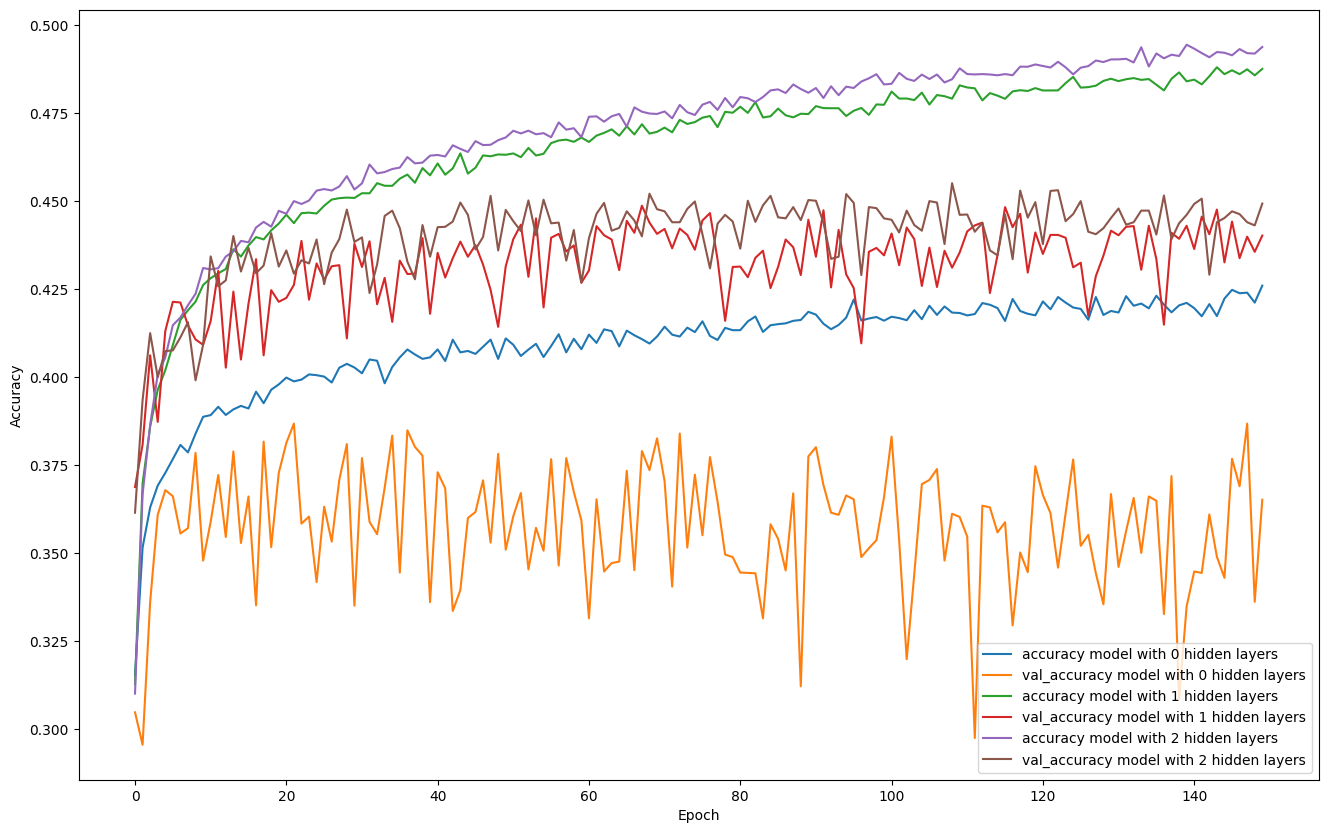

In [12]:
plt.figure(figsize=(16,10))
for i, hist in enumerate([history_0, history_1, history_2]):
    plt.plot(hist.history['accuracy'], label=f'accuracy model with {i} hidden layers')
    plt.plot(hist.history['val_accuracy'], label = f'val_accuracy model with {i} hidden layers')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
plt.show()


You can see in the plot that the accuracy of all models after 150 epochs. The model with 0 layer does not reach good accuracy and the validation accuracy has a very high variation. For the other 2 models the accuracy and test go up, but they do not differ that much from each other. None of the models reach above 50% accuracy at this amount of epochs. 

Early stopping is not used in these models, and it would also not be convenient. We are only using test and train. Our validation set is our test set, so if early stopping would use information from that it would in a sense be cheating. 

### 2. Model with big hidden layer

Model 20 uses 1 hidden layer with 512 units. For the rest it uses the same parameters as 1. 

In [19]:
with tf.device('/CPU:0'):
    model_20 = models.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

    model_20.compile(optimizer="adam",
                    loss = "sparse_categorical_crossentropy",
                    metrics=["accuracy"])

    history_20 = model_20.fit(train_images, train_labels, epochs=915,
                        validation_data=(test_images, test_labels))

    model_20_test_loss, model_20_test_acc = model_20.evaluate(test_images, test_labels)

Epoch 1/915
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8960 - accuracy: 0.3250 - val_loss: 1.7217 - val_accuracy: 0.3790
Epoch 2/915
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6987 - accuracy: 0.3919 - val_loss: 1.6513 - val_accuracy: 0.4167
Epoch 3/915
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6259 - accuracy: 0.4226 - val_loss: 1.6439 - val_accuracy: 0.4112
Epoch 4/915
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5847 - accuracy: 0.4360 - val_loss: 1.5847 - val_accuracy: 0.4379
Epoch 5/915
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5509 - accuracy: 0.4464 - val_loss: 1.5708 - val_accuracy: 0.4416
Epoch 6/915
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5299 - accuracy: 0.4524 - val_loss: 1.5384 - val_accuracy: 0.4563
Epoch 7/915
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5082 - accuracy: 0.4653 - val_loss: 1.5312 - val_ac

In [20]:
model_20.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


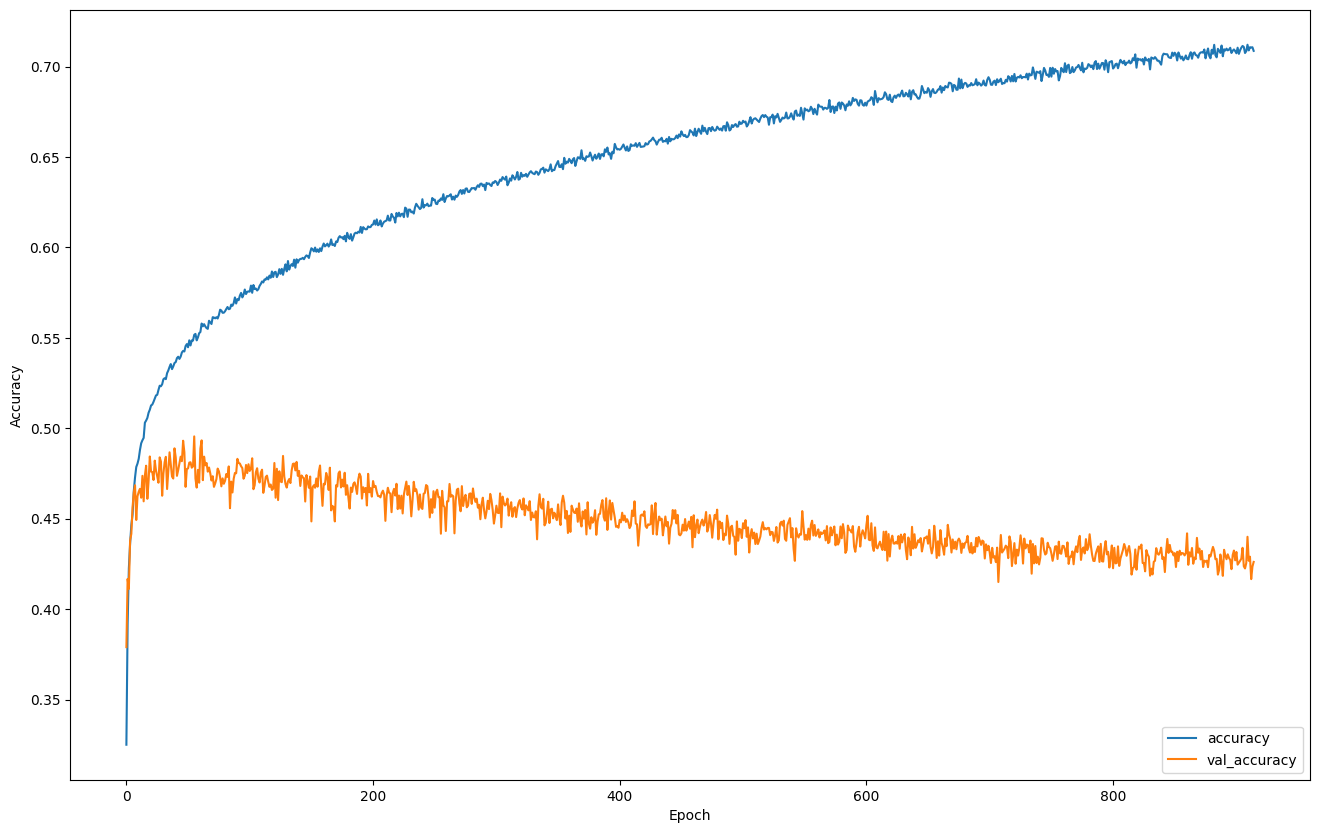

In [21]:
plt.figure(figsize=(16,10))
plt.plot(history_20.history['accuracy'], label='accuracy')
plt.plot(history_20.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()